# Exploration des données 

In [1322]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import warnings                                
warnings.filterwarnings('ignore') 
sns.set_theme("paper")

- Lors de l'importation des données, il faut préciser que les dates doivent être converties en format date 
- Afficher les 5 premiers lignes et la taille des 3 dataframes 
- Fusionner train et set des datas
- Analyse chaque dataframe individuellement ( feature engineering si nécssaire) 
    - type des variables/ convertion si nécessaire
    - valeur manquantes 
    - Analyse variable quanti / quali 

- Fusion pour avoir un seul dataset ( Analyse aussi) et Selection des variables et transformations pour la construction des modèles
    

In [1]:
pwd

'C:\\Users\\ROUZOUMKA'

In [1324]:
#importation des données 
traindemographics=pd.read_csv("traindemographics.csv",parse_dates=["birthdate"])
testdemographics=pd.read_csv("testdemographics.csv",parse_dates=["birthdate"])
trainperf=pd.read_csv("trainperf.csv",parse_dates=["approveddate","creationdate"])
testperf=pd.read_csv("testperf.csv",parse_dates=["approveddate","creationdate"])
trainprevloans=pd.read_csv("trainprevloans.csv",parse_dates=["approveddate","creationdate","closeddate","firstduedate","firstrepaiddate"])
testprevloans=pd.read_csv("testprevloans.csv",parse_dates=["approveddate","creationdate","closeddate","firstduedate","firstrepaiddate"])
SampleSubmission=pd.read_csv("SampleSubmission.csv")

In [1325]:
print(f'demographie train : {traindemographics.shape}')
display(traindemographics.head())
print(f'demographie test: {testdemographics.shape}')
display(testdemographics.head())

print(f'perf train: {trainperf.shape}')
display(trainperf.head())
print(f'perf test: {testperf.shape}')
display(testperf.head())

print(f'prevloan train: {trainprevloans.shape}')
display(trainprevloans.head())
print(f'prevloan test: {testprevloans.shape}')
display(testprevloans.head())
print(f'SampleSubmission: {SampleSubmission.shape}')
display(SampleSubmission.head())

demographie train : (4346, 9)


,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


demographie test: (1487, 9)


,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858f305c8dd672015c93b1db645db4,1976-08-28,Savings,5.296628,7.593965,Heritage Bank,NaN,Permanent,NaN
1,8a858f085a477386015a47fb049e49ca,1978-06-23,Savings,3.294513,6.596602,UBA,NaN,Permanent,NaN
2,8a858e6f5cd5e874015cd6f5634c39ad,1984-04-04,Savings,8.501912,7.729364,First Bank,NaN,Permanent,NaN
3,8a858e9d5bfd7037015bfdab79f61305,1983-05-28,Savings,3.318904,6.681595,UBA,NaN,Permanent,NaN
4,8a858fde56eb02280156eb6dafc128ac,1982-03-29,Savings,6.354624,4.949031,First Bank,NaN,Self-Employed,NaN


perf train: (4368, 10)


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good


perf test: (1450, 9)


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,NaN
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000,34500.0,30,NaN
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30,NaN


prevloan train: (18183, 12)


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,NaN,2016-09-14,2016-09-01 15:51:43
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,NaN,2017-05-30,2017-05-26 00:00:00
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,NaN,2017-04-04,2017-04-26 22:03:47
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,10000.0,11500.0,15,2017-04-24 01:35:52,NaN,2017-04-24,2017-04-24 00:48:43
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,10000.0,11500.0,15,2017-07-14 21:18:43,NaN,2017-07-03,2017-07-14 21:08:35


prevloan test: (5907, 12)


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00,2016-05-17 09:36:55,10000.0,13000.0,30,2016-06-17 00:04:15,NaN,2016-06-16,2016-06-16 15:44:08
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59,2017-02-04 20:28:52,30000.0,36800.0,60,2017-03-02 16:22:58,NaN,2017-03-06,2017-03-02 16:07:47
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22,2017-03-04 09:28:16,30000.0,34400.0,30,2017-04-02 00:44:24,NaN,2017-04-03,2017-04-01 21:29:46
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14,2016-06-02 13:27:08,10000.0,13000.0,30,2016-07-04 11:34:04,NaN,2016-07-04,2016-07-04 11:19:01
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12,2016-05-16 08:13:04,10000.0,11500.0,15,2016-06-02 00:02:58,NaN,2016-05-31,2016-06-01 15:22:34


SampleSubmission: (1450, 2)


,customerid,Good_Bad_flag
0,8a28afc7474813a40147639ec637156b,1
1,8a3735d5518aba7301518ac34413010d,1
2,8a76e7d443e6e97c0143ed099d102b1d,1
3,8a818823525dceef01525deda2480384,1
4,8a818926522ea5ef01523aff15c37482,1


In [1326]:
#fusion des data demographics et prevloan
demographics=pd.concat((traindemographics,testdemographics))
prevloan=pd.concat((trainprevloans,testprevloans))

In [1327]:
demographics.shape

(5833, 9)

## Analyse Data Demographics

In [1328]:
demographics.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [1329]:
demographics.drop_duplicates(inplace=True)

In [1330]:
demographics.shape

(5818, 9)

In [1331]:
demographics.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

In [1332]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5818 entries, 0 to 1486
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  5818 non-null   object        
 1   birthdate                   5818 non-null   datetime64[ns]
 2   bank_account_type           5818 non-null   object        
 3   longitude_gps               5818 non-null   float64       
 4   latitude_gps                5818 non-null   float64       
 5   bank_name_clients           5818 non-null   object        
 6   bank_branch_clients         65 non-null     object        
 7   employment_status_clients   4953 non-null   object        
 8   level_of_education_clients  795 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 454.5+ KB


On a **6 variables qualitatives, 1 date et 2 variables quantiatives**. 

## Valeurs manquantes 

In [1333]:
# Graphe valeur manquante avec couleur !! Bonne visualtion par chaque colonne 
(demographics.isnull().sum()/demographics.shape[0]).sort_values(ascending=False)*100

bank_branch_clients           98.882778
level_of_education_clients    86.335510
employment_status_clients     14.867652
customerid                     0.000000
birthdate                      0.000000
bank_account_type              0.000000
longitude_gps                  0.000000
latitude_gps                   0.000000
bank_name_clients              0.000000
dtype: float64

**On a 3 varibales qui admentent des valeurs manquantes : bank_branch_clients (98%), level_of_education_clients, employment_status_clients.**

### Variable bank_account_type

In [1334]:
#plot le graphique avec les pourcentages dessus + changer la taille et trouver un thème plus chic) et exporter 
#focntion pour tracer plusieurs bar plot et generer des interpretations basiques)
print("nombre de moadalités : ",demographics["bank_account_type"].nunique())
(demographics["bank_account_type"].value_counts()/demographics.shape[0])*100

nombre de moadalités :  3


Savings    78.549330
Other      20.075627
Current     1.375043
Name: bank_account_type, dtype: float64

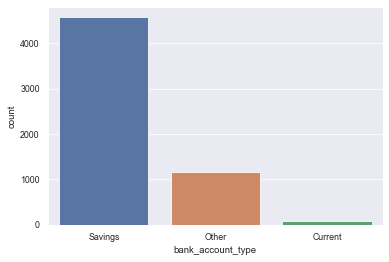

In [1335]:
sns.countplot(x='bank_account_type',data=demographics)
plt.show()

 **Cette variable admet trois modalités ( saving,other et Current ). la modalité saving est la plus representée. cette variable admet des modalités déséquilibrées. Il est nominale.**

## Variable bank_name_clients

In [1336]:
print("nombre de moadalités : ",demographics["bank_name_clients"].nunique())
(demographics["bank_name_clients"].value_counts()/demographics.shape[0])*100

nombre de moadalités :  18


GT Bank               36.576143
First Bank            13.578549
Access Bank            9.745617
UBA                    7.923685
Zenith Bank            7.081471
Diamond Bank           6.737711
EcoBank                3.471983
Stanbic IBTC           3.317291
FCMB                   2.887590
Skye Bank              2.509453
Fidelity Bank          2.389137
Sterling Bank          1.151598
Wema Bank              0.635957
Union Bank             0.618769
Heritage Bank          0.464077
Keystone Bank          0.429701
Standard Chartered     0.326573
Unity Bank             0.154692
Name: bank_name_clients, dtype: float64

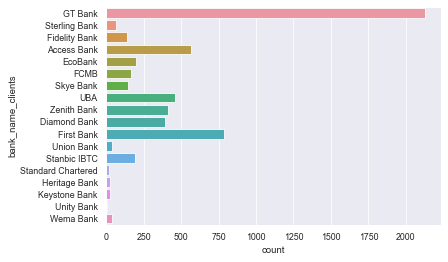

In [1337]:
sns.countplot(y='bank_name_clients',data=demographics)
plt.show()

**Nous avons 18 modalités, la modalité GT Bank est largement la plus representée, avec UBA, First Bank. Nous avons des modalités qui sont très peu presentes ( Unity Bank , Standard Chartered )**. 

## Variable  bank_branch_clients

In [1338]:
print("nombre de moadalités : ",demographics["bank_branch_clients"].nunique())
(demographics["bank_branch_clients"].value_counts(dropna=False)/demographics.shape[0])*100

nombre de moadalités :  55


NaN                                                               98.882778
HEAD OFFICE                                                        0.051564
OGBA                                                               0.051564
OBA AKRAN                                                          0.051564
APAPA                                                              0.051564
AJOSE ADEOGUN                                                      0.034376
OREGUN                                                             0.034376
MAFOLUKU                                                           0.017188
LEKKI EPE                                                          0.017188
GBAGADA                                                            0.017188
AKOWONJO                                                           0.017188
DUGBE,IBADAN                                                       0.017188
17, SANUSI FAFUNWA STREET, VICTORIA ISLAND, LAGOS                  0.017188
ILUPEJU     

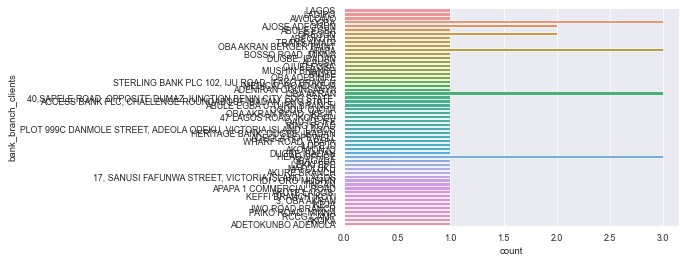

In [1339]:
sns.countplot(y='bank_branch_clients',data=demographics)
plt.show()

**Trop de modalités et à faible effectif !!  variable à supprimer à priori.**

## Variable Employment_status_clients

In [1340]:
print("nombre de moadalités : ",demographics["employment_status_clients"].nunique())
(demographics["employment_status_clients"].value_counts()/demographics.shape[0])*100

nombre de moadalités :  6


Permanent        72.275696
Self-Employed     8.078377
Student           3.248539
Unemployed        1.357855
Retired           0.137504
Contract          0.034376
Name: employment_status_clients, dtype: float64

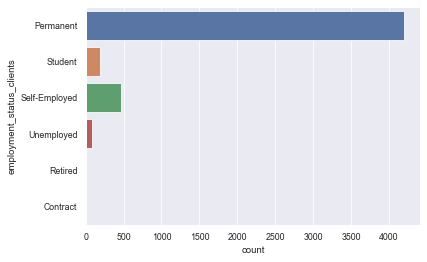

In [1341]:
sns.countplot(y='employment_status_clients',data=demographics)
plt.show()

**Les clients ont majoriterement des postes permanents ( 72%). Très peu de retraités et de contractuels. La variable a 6 modalités**

## Variable level_of_education_clients

In [1342]:
print("nombre de moadalités : ",demographics["level_of_education_clients"].nunique())
(demographics["level_of_education_clients"].value_counts()/demographics.shape[0])*100

nombre de moadalités :  4


Graduate         9.900309
Secondary        2.028188
Post-Graduate    1.546923
Primary          0.189068
Name: level_of_education_clients, dtype: float64

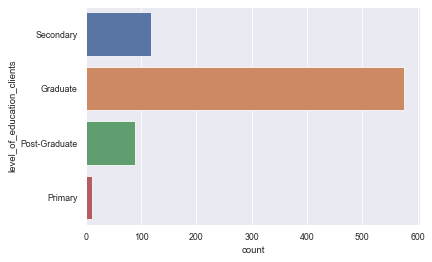

In [1343]:
sns.countplot(y='level_of_education_clients',data=demographics)
plt.show()

**Cette variable admet 4 modalités. Elle semble importante mais ella admet 86% de valeurs manquantes, c'est énorme !!!**

**Pas d'intérêt de representer des variables longitudes et latitudes. elle nous joue clairement un rôle dans la construction du modèle.**

### Feature Engineering variable Birthdate

<AxesSubplot:ylabel='Frequency'>

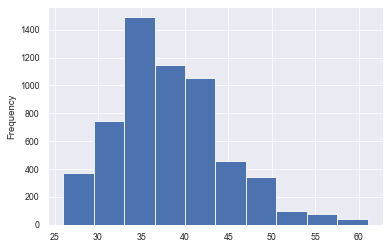

In [1344]:
#Graphique fonction ( une variable qui trace histogramme + density et boxplot)
Age = 2022-demographics['birthdate'].dt.year
Age.plot(kind='hist')

<AxesSubplot:>

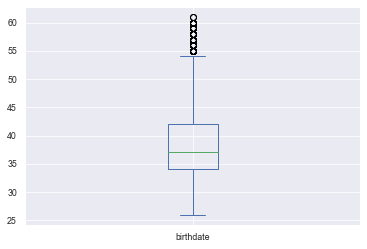

In [1345]:
Age.plot(kind='box')

La variable Age semble suivre une distribution normale (un peu asymétrique à gauche).

In [1346]:
#Skewness + Kurtosis ( une fonction qui prend un data frame et donnne toutes les statistqiues imporantes)
Age.describe()

count    5818.000000
mean       37.960639
std         6.174445
min        26.000000
25%        34.000000
50%        37.000000
75%        42.000000
max        61.000000
Name: birthdate, dtype: float64

In [1347]:
# Ajout de la colonne Age 
demographics["age"]=Age

**Pas d'analyse bivariée pertinente à faire vu la signification des variables**

In [1348]:
col_supp=["bank_branch_clients","level_of_education_clients","employment_status_clients","longitude_gps","latitude_gps","birthdate"]
demographics_new=demographics.drop(col_supp,axis=1)

In [1349]:
demographics_new.shape

(5818, 4)

In [1350]:
demographics_new.columns

Index(['customerid', 'bank_account_type', 'bank_name_clients', 'age'], dtype='object')

## Analyse Data Prevloan

In [1351]:
prevloan.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,NaN,2016-09-14,2016-09-01 15:51:43
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,NaN,2017-05-30,2017-05-26 00:00:00
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,NaN,2017-04-04,2017-04-26 22:03:47
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,10000.0,11500.0,15,2017-04-24 01:35:52,NaN,2017-04-24,2017-04-24 00:48:43
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,10000.0,11500.0,15,2017-07-14 21:18:43,NaN,2017-07-03,2017-07-14 21:08:35


In [1352]:
prevloan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24090 entries, 0 to 5906
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customerid       24090 non-null  object        
 1   systemloanid     24090 non-null  int64         
 2   loannumber       24090 non-null  int64         
 3   approveddate     24090 non-null  datetime64[ns]
 4   creationdate     24090 non-null  datetime64[ns]
 5   loanamount       24090 non-null  float64       
 6   totaldue         24090 non-null  float64       
 7   termdays         24090 non-null  int64         
 8   closeddate       24090 non-null  datetime64[ns]
 9   referredby       1351 non-null   object        
 10  firstduedate     24090 non-null  datetime64[ns]
 11  firstrepaiddate  24090 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(2), int64(3), object(2)
memory usage: 2.4+ MB


In [1353]:
prevloan.drop_duplicates(inplace=True)

## Valeurs manquantes 

In [1354]:
prevloan.shape

(24090, 12)

In [1355]:
 (prevloan.isnull().sum()/prevloan.shape[0]).sort_values(ascending=False)*100

referredby         94.391864
customerid          0.000000
systemloanid        0.000000
loannumber          0.000000
approveddate        0.000000
creationdate        0.000000
loanamount          0.000000
totaldue            0.000000
termdays            0.000000
closeddate          0.000000
firstduedate        0.000000
firstrepaiddate     0.000000
dtype: float64

**colonne reffered By à supprimer**

In [1356]:
prevloan.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'closeddate',
       'referredby', 'firstduedate', 'firstrepaiddate'],
      dtype='object')

In [1357]:
prevloan.customerid.value_counts()

8a858ff554e290e10154fe4e6b3f648c    33
8a858f7d5578012a01557ea194d94948    26
8a858e4456ced8470156d73452f85335    22
8a85886f54517ee0015470749d3c3ce7    21
8a85888c548fb3d50154947fe59c32cf    21
                                    ..
8a858e005c2154c2015c2c44a86e0eaf     1
8a858e675c3fe0a1015c52ff728c13e3     1
8a858e8d5c35bc85015c376e591c637d     1
8a858f215d2d2890015d30d3817d477e     1
8a858e165cf9d8e3015cfffb0c61459f     1
Name: customerid, Length: 5801, dtype: int64

**On a plusieurs variables date et des plusieurs infos sur les mêmes clients sont présents dans les données. On doit donc regrouper les informations et faire du features engineering sur les variables dates**

In [1358]:
prevloan['termdays'].value_counts()

30    14754
15     8012
60     1284
90       40
Name: termdays, dtype: int64

## Feature engineering 

In [1359]:
# 1.  temp_cloture=approveddate-closeddate
temp_cloture = prevloan['closeddate'].dt.day-prevloan[ 'approveddate'].dt.day
prevloan["temp_cloture"]=temp_cloture
temp_cloture=pd.pivot_table(prevloan,values=["temp_cloture"],index=["customerid"],aggfunc=np.sum)
#2. temps_premier_pay='firstduedate'-'firstrepaiddate
temps_pay=prevloan['firstduedate']-prevloan['firstrepaiddate']
prevloan["temps_pay"]=prevloan['firstduedate'].dt.day-prevloan['firstrepaiddate'].dt.day
temps_pay=pd.pivot_table(prevloan,values=["temps_pay"],index=["customerid"],aggfunc=np.sum)
#creationdate-approveddate? supprimer creationdate
#3. interet=totaldue-Loanmount
interet = prevloan['totaldue']-prevloan['loanamount']
prevloan["interet"]= prevloan['totaldue']-prevloan['loanamount']
interet=pd.pivot_table(prevloan,values=["interet"],index=["customerid"],aggfunc=np.sum)

#recoder les terms days 
#recode={30:1,15:2,60:3,90:40}
#prevloan['termdays']=prevloan['termdays'].map(recode)

In [1360]:
prevloan_new=pd.concat((temp_cloture,temps_pay,interet),axis=1)
prevloan_new.reset_index(inplace=True)
prevloan_new.head()

,customerid,temp_cloture,temps_pay,interet
0,8a1088a0484472eb01484669e3ce4e0b,22,-6,1500.0
1,8a1a1e7e4f707f8b014f797718316cad,5,1,19500.0
2,8a1a32fc49b632520149c3b8fdf85139,-17,3,16500.0
3,8a1eb5ba49a682300149c3c068b806c7,79,-95,32400.0
4,8a1edbf14734127f0147356fdb1b1eb2,6,-22,4500.0


In [1361]:
prevloan_new.shape

(5801, 4)

## Variable interet ( moyenne des interêts)

<AxesSubplot:ylabel='Frequency'>

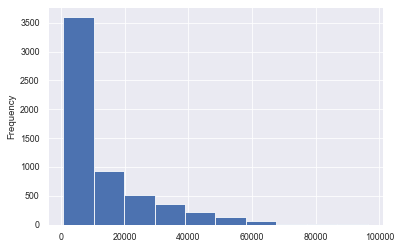

In [1362]:
prevloan_new["interet"].plot(kind="hist")

In [1363]:
prevloan_new["interet"].describe()

count     5801.000000
mean     12747.373091
std      13976.624133
min        750.000000
25%       3000.000000
50%       6000.000000
75%      17850.000000
max      96300.000000
Name: interet, dtype: float64

## Variable  temps_pay

<AxesSubplot:ylabel='Frequency'>

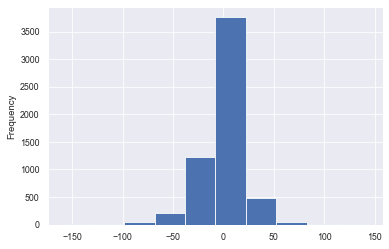

In [1364]:
prevloan_new["temps_pay"].plot(kind="hist")

In [1365]:
prevloan_new["temps_pay"].describe()

count    5801.000000
mean       -0.744182
std        21.698969
min      -159.000000
25%        -9.000000
50%         1.000000
75%         9.000000
max       143.000000
Name: temps_pay, dtype: float64

## Variable  temp_cloture

<AxesSubplot:ylabel='Frequency'>

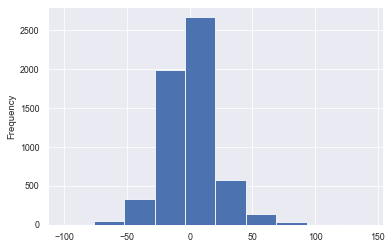

In [1366]:
prevloan_new["temp_cloture"].plot(kind="hist")

In [1367]:
prevloan_new["temp_cloture"].describe()

count    5801.000000
mean        0.559042
std        21.727386
min      -101.000000
25%       -12.000000
50%         0.000000
75%        12.000000
max       142.000000
Name: temp_cloture, dtype: float64

In [1368]:
prevloan_new.shape

(5801, 4)

## Analyse Data pref

In [1369]:
trainperf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good


In [1370]:
trainperf.drop_duplicates()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good
...,...,...,...,...,...,...,...,...,...,...
4363,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42,2017-07-30 08:18:30,10000.0,13000.0,30,NaN,Bad
4364,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47,2017-07-27 14:35:40,10000.0,13000.0,30,NaN,Bad
4365,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57,2017-07-25 15:24:47,10000.0,11500.0,15,NaN,Bad
4366,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27,2017-07-14 12:50:21,10000.0,13000.0,30,8a858eda5c8863ff015c9dead65807bb,Bad


## Valeurs manquantes 

In [1371]:
# Graphe valeur manquante avec couleur !! Bonne visualtion par chaque colonne 
(trainperf.isnull().sum()/trainperf.shape[0]).sort_values(ascending=False)*100

referredby       86.561355
customerid        0.000000
systemloanid      0.000000
loannumber        0.000000
approveddate      0.000000
creationdate      0.000000
loanamount        0.000000
totaldue          0.000000
termdays          0.000000
good_bad_flag     0.000000
dtype: float64

In [1372]:
# Graphe valeur manquante avec couleur !! Bonne visualtion par chaque colonne 
(testperf.isnull().sum()/testperf.shape[0]).sort_values(ascending=False)*100

referredby      87.310345
customerid       0.000000
systemloanid     0.000000
loannumber       0.000000
approveddate     0.000000
creationdate     0.000000
loanamount       0.000000
totaldue         0.000000
termdays         0.000000
dtype: float64

**Variable referredby à supprimer**

### Variable cible : good_bad_flag 

In [1373]:
print("nombre de moadalités : ",trainperf["good_bad_flag"].nunique())
(trainperf["good_bad_flag"].value_counts()/trainperf.shape[0])*100

nombre de moadalités :  2


Good    78.205128
Bad     21.794872
Name: good_bad_flag, dtype: float64

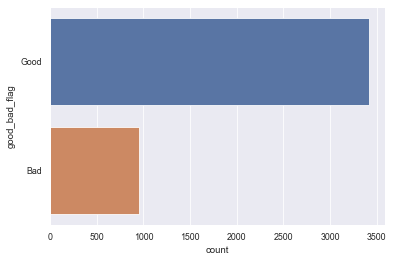

In [1374]:
sns.countplot(y="good_bad_flag",data=trainperf)
plt.show()

**Nous avons deux modalités Good et Bad. les classes sont déséquilibrées, la classe majoritaire est Good avec 78.20 %**

In [1375]:
#interet_es=totaldue-Loanmount
trainperf["interet_es"] = trainperf['totaldue']-trainperf['loanamount']
testperf["interet_es"]= testperf['totaldue']-testperf['loanamount']
#recode variable "good_bad_flag
recode={"Good":1,"bad":0}
trainperf["good_bad_flag"]=trainperf["good_bad_flag"].map(recode)

In [1376]:
col_supp=["systemloanid",'approveddate','loannumber','creationdate', 'loanamount', 'totaldue',
       'referredby']
trainperf_new=trainperf.drop(col_supp,axis=1)
testperf_new=testperf.drop(col_supp,axis=1)

In [1377]:
trainperf_new.head()

,customerid,termdays,good_bad_flag,interet_es
0,8a2a81a74ce8c05d014cfb32a0da1049,30,1.0,4500.0
1,8a85886e54beabf90154c0a29ae757c0,30,1.0,2250.0
2,8a8588f35438fe12015444567666018e,15,1.0,2250.0
3,8a85890754145ace015429211b513e16,15,1.0,1500.0
4,8a858970548359cc0154883481981866,30,1.0,4000.0


In [1378]:
trainperf.shape

(4368, 11)

In [1379]:
testperf_new.head()

,customerid,termdays,interet_es
0,8a858899538ddb8e015390510b321f08,30,2250.0
1,8a858959537a097401537a4e316e25f7,30,4000.0
2,8a8589c253ace09b0153af6ba58f1f31,30,4500.0
3,8a858e095aae82b7015aae86ca1e030b,30,4500.0
4,8a858e225a28c713015a30db5c48383d,30,4500.0


In [1380]:
testperf_new.shape

(1450, 3)

In [1381]:
trainperf_new['set'] = 'train'
testperf_new['set'] = 'test'
Tperf=pd.concat([trainperf_new,testperf_new])

## Fusion des datasets 

In [1382]:
print("demographics",demographics_new.shape)
print("Tperf",Tperf.shape)
print("pervloan",prevloan_new.shape)

demographics (5818, 4)
Tperf (5818, 5)
pervloan (5801, 4)


In [1383]:
#fusion des données Demographics + perf + prevloan
data=pd.merge(Tperf,demographics_new,how="inner")
data.shape

(5818, 8)

In [1384]:
data_new=pd.merge(data,prevloan_new,how="left")
data_new.shape

(5818, 11)

In [1385]:
data_new=data_new.fillna(0)

In [1386]:
data_new.isnull().sum()

customerid           0
termdays             0
good_bad_flag        0
interet_es           0
set                  0
bank_account_type    0
bank_name_clients    0
age                  0
temp_cloture         0
temps_pay            0
interet              0
dtype: int64

## Analyse data fusion

In [1387]:
data_new.head()

,customerid,termdays,good_bad_flag,interet_es,set,bank_account_type,bank_name_clients,age,temp_cloture,temps_pay,interet
0,8a2a81a74ce8c05d014cfb32a0da1049,30,1.0,4500.0,train,Other,Diamond Bank,50,27.0,-20.0,42900.0
1,8a85886e54beabf90154c0a29ae757c0,30,1.0,2250.0,train,Savings,GT Bank,37,0.0,0.0,0.0
2,8a8588f35438fe12015444567666018e,15,1.0,2250.0,train,Other,EcoBank,38,54.0,-39.0,10500.0
3,8a85890754145ace015429211b513e16,15,1.0,1500.0,train,Savings,First Bank,45,2.0,-15.0,4500.0
4,8a858970548359cc0154883481981866,30,1.0,4000.0,train,Other,GT Bank,36,-26.0,25.0,38400.0


In [1388]:
data_new.columns

Index(['customerid', 'termdays', 'good_bad_flag', 'interet_es', 'set',
       'bank_account_type', 'bank_name_clients', 'age', 'temp_cloture',
       'temps_pay', 'interet'],
      dtype='object')

In [1389]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5818 entries, 0 to 5817
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerid         5818 non-null   object 
 1   termdays           5818 non-null   int64  
 2   good_bad_flag      5818 non-null   float64
 3   interet_es         5818 non-null   float64
 4   set                5818 non-null   object 
 5   bank_account_type  5818 non-null   object 
 6   bank_name_clients  5818 non-null   object 
 7   age                5818 non-null   int64  
 8   temp_cloture       5818 non-null   float64
 9   temps_pay          5818 non-null   float64
 10  interet            5818 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 545.4+ KB


In [1390]:
data_new['good_bad_flag'] = data_new['good_bad_flag'].astype('category')

## Matrice de correlation

In [1391]:
col_quanti=["termdays",'interet_es','age','temp_cloture', 'temps_pay', 'interet']
data_quanti=data_new[col_quanti]
data_quanti.head()

,termdays,interet_es,age,temp_cloture,temps_pay,interet
0,30,4500.0,50,27.0,-20.0,42900.0
1,30,2250.0,37,0.0,0.0,0.0
2,15,2250.0,38,54.0,-39.0,10500.0
3,15,1500.0,45,2.0,-15.0,4500.0
4,30,4000.0,36,-26.0,25.0,38400.0


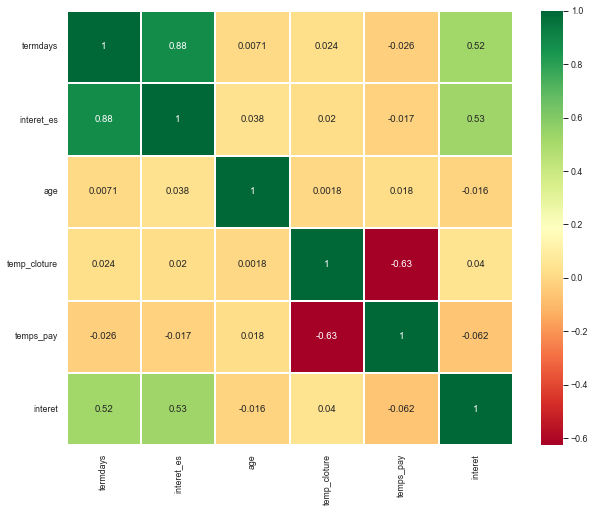

In [1392]:
sns.heatmap(data_quanti.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

**Les variables termdays et interest_es sont sont corrélées ainsi que la variable temps_pay et temp_cloture**

### bank_account_type  / bank_name_clients vs good_bad_flag 

In [1393]:
pd.crosstab(data_new.bank_account_type,data_new.good_bad_flag ).style.background_gradient(cmap='summer_r')

good_bad_flag,0.0,1.0
bank_account_type,,
Current,23,57
Other,412,756
Savings,1967,2603


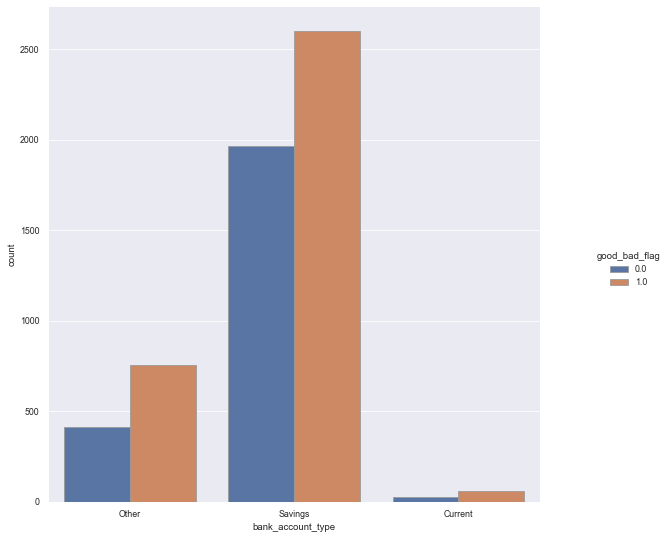

In [1394]:
import seaborn as sns
sns.catplot(x="bank_account_type", hue="good_bad_flag", kind="count", edgecolor=".6",data=data_new)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

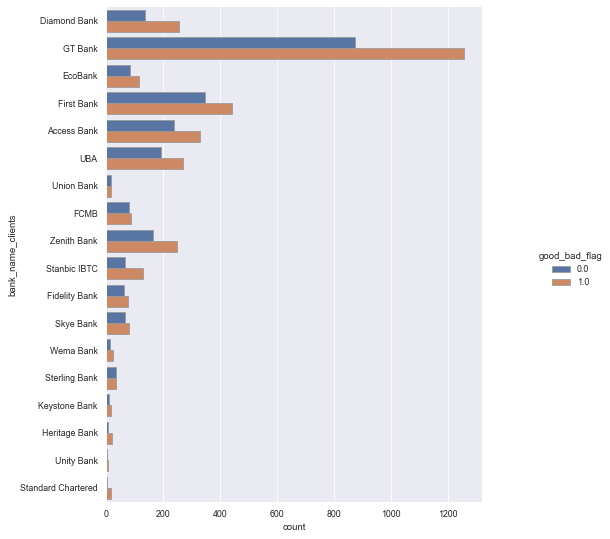

In [1395]:
sns.catplot(y='bank_name_clients', hue="good_bad_flag", kind="count", edgecolor=".6",data=data_new)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [1396]:
def VCramer(chi2,l,c,N):
  import numpy as np
  mini = min(l-1,c-1)
  return np.sqrt(chi2/N*mini)
 
def Tschuprow(chi2,l,c,N):
  import numpy as np
  return np.sqrt(chi2/N*(l-1)*(c-1))

def var_qual_vs_cible(df,noms_var,nom_cible,seuil):
  from scipy.stats import chi2_contingency
  import pandas as pd 
  pvalue=[]
  V=[]
  T=[]
  c=len(df[nom_cible].unique())
  N=df.shape[0]
  for var in noms_var:
    tableau_contingence=pd.DataFrame( pd.crosstab(df[var], 
                                  df[nom_cible],  
                                  margins = False))
    l=len(df[var].unique())

    chi2, p= chi2_contingency(tableau_contingence)[0:2]
    pvalue.append(p)
    V.append(VCramer(chi2,l,c,N))
    T.append(Tschuprow(chi2,l,c,N))
 
  dic={"variable":noms_var,"pvalue":pvalue,"VCramer":V,"Tschuprow":T}
  res=pd.DataFrame(dic)
  return res

In [1397]:
noms_var=['bank_account_type','bank_name_clients']
resultats=var_qual_vs_cible(data_new,noms_var,"good_bad_flag",0.05)
resultats.style.background_gradient(cmap='summer_r')

,variable,pvalue,VCramer,Tschuprow
0,bank_account_type,0.000001,0.069882,0.098829
1,bank_name_clients,0.026552,0.071774,0.295932


**Il semble ne pas avoir de lien entre la variable bank_account_type et la variable cible ainsi qu'avec Bank_name_clients**.

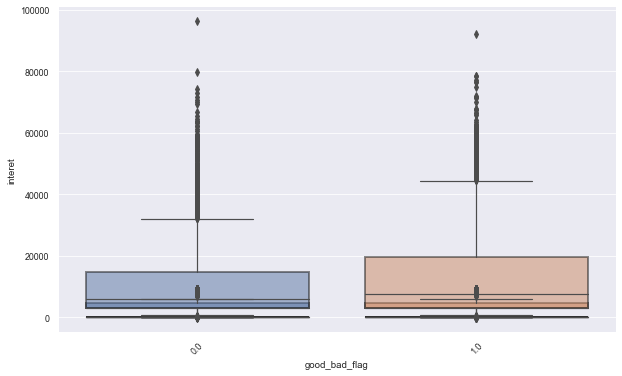

In [1398]:
# faire ce graphque pour les autres variables
plt.figure(figsize = (10, 6))
for var in col_quanti:
    ax = sns.boxplot(x="good_bad_flag", y=var, data=data_new)
    plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
    plt.xticks(rotation=45)

In [1399]:
#test Anova ? validité ???
import statsmodels.api as sm
from statsmodels.formula.api import ols

def var_quanti_vs_cible(df,noms_var,nom_cible):
    pvalue=[]
    for var in noms_var:
        model = ols(f'{var} ~ C({nom_cible})', data=df).fit()
        aov_table = sm.stats.anova_lm(model, typ=2)
        pvalue.append(float(aov_table['PR(>F)'][0]))
   
    dic={"variable":noms_var,"pvalue":pvalue}
    res=pd.DataFrame(dic)
    return res

In [1400]:
results_anova=var_quanti_vs_cible(data_new,col_quanti,"good_bad_flag")
results_anova.style.background_gradient(cmap='summer_r')

,variable,pvalue
0,termdays,0.251357
1,interet_es,0.018887
2,age,0.004693
3,temp_cloture,0.588281
4,temps_pay,0.528200
5,interet,0.000002


# Création des modèles 

In [1401]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5818 entries, 0 to 5817
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customerid         5818 non-null   object  
 1   termdays           5818 non-null   int64   
 2   good_bad_flag      5818 non-null   category
 3   interet_es         5818 non-null   float64 
 4   set                5818 non-null   object  
 5   bank_account_type  5818 non-null   object  
 6   bank_name_clients  5818 non-null   object  
 7   age                5818 non-null   int64   
 8   temp_cloture       5818 non-null   float64 
 9   temps_pay          5818 non-null   float64 
 10  interet            5818 non-null   float64 
dtypes: category(1), float64(4), int64(2), object(4)
memory usage: 634.8+ KB


In [1402]:
def tranform_variable(nom_var, df):
    df_dummies = pd.get_dummies(df[nom_var], prefix=nom_var).iloc[:, 1:] 
    return df_dummies 

In [1403]:
dummy_cols = ['bank_account_type','bank_name_clients']
data_final=data_new
for col_name in dummy_cols:
    dummies = tranform_variable(col_name,data_new)
    data_final= pd.concat([data_final, dummies], axis=1) 
    data_final= data_final.drop([col_name], axis=1) 

In [1404]:
data_final

,customerid,termdays,good_bad_flag,interet_es,set,age,temp_cloture,temps_pay,interet,bank_account_type_Other,...,bank_name_clients_Keystone Bank,bank_name_clients_Skye Bank,bank_name_clients_Stanbic IBTC,bank_name_clients_Standard Chartered,bank_name_clients_Sterling Bank,bank_name_clients_UBA,bank_name_clients_Union Bank,bank_name_clients_Unity Bank,bank_name_clients_Wema Bank,bank_name_clients_Zenith Bank
0,8a2a81a74ce8c05d014cfb32a0da1049,30,1.0,4500.0,train,50,27.0,-20.0,42900.0,1,...,0,0,0,0,0,0,0,0,0,0
1,8a85886e54beabf90154c0a29ae757c0,30,1.0,2250.0,train,37,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,8a8588f35438fe12015444567666018e,15,1.0,2250.0,train,38,54.0,-39.0,10500.0,1,...,0,0,0,0,0,0,0,0,0,0
3,8a85890754145ace015429211b513e16,15,1.0,1500.0,train,45,2.0,-15.0,4500.0,0,...,0,0,0,0,0,0,0,0,0,0
4,8a858970548359cc0154883481981866,30,1.0,4000.0,train,36,-26.0,25.0,38400.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813,8a858fb45bb59c21015bb88a191f58f2,15,0.0,1500.0,test,32,-41.0,12.0,3000.0,0,...,0,0,0,0,0,0,0,0,0,0
5814,8a858fcb5b00cc54015b0253ced26a5f,30,0.0,3000.0,test,45,-32.0,2.0,3000.0,0,...,0,0,0,0,0,0,0,0,0,0
5815,8a858fde56eb02280156f59b976d46c0,60,0.0,8000.0,test,28,65.0,-83.0,31600.0,0,...,0,0,0,0,0,0,0,0,0,0
5816,8a858e10570f2d65015717fcfec44996,90,0.0,8100.0,test,33,-24.0,49.0,74100.0,1,...,0,0,0,0,0,0,1,0,0,0


In [1405]:
train=data_final.loc[data_final.set=="train",:]
train=train.drop(["set","customerid"],axis=1)
test=data_final.loc[data_final.set=="test",:]
test=test.drop(["set","good_bad_flag","customerid"],axis=1)

In [1406]:
#split the train and test
from sklearn.model_selection import train_test_split
X=train.drop(["good_bad_flag"],axis=1)
y=train.good_bad_flag
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3, random_state=15)

In [1407]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_auc_score,classification_report,roc_auc_score,roc_curve,auc


def model(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):

    algorithm.fit(dtrain_X[cols],dtrain_Y)
    predictions = algorithm.predict(dtest_X[cols])
    print (algorithm)
    
    print ("Accuracy score : ", accuracy_score(predictions,dtest_Y))
    print ("Recall score   : ", recall_score(predictions,dtest_Y))
    print ("classification report :\n",classification_report(predictions,dtest_Y))
    
    fig = plt.figure(figsize=(10,8))
    ax  = fig.add_subplot(111)
    prediction_probabilities = algorithm.predict_proba(dtest_X[cols])[:,1]
    fpr , tpr , thresholds   = roc_curve(dtest_Y,prediction_probabilities)
    ax.plot(fpr,tpr,label   = ["Area under curve : ",auc(fpr,tpr)],linewidth=2,linestyle="dotted")
    ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
    plt.legend(loc="best")
    plt.title("ROC-CURVE & AREA UNDER CURVE")


LogisticRegression()
Accuracy score :  0.7818459191456903
Recall score   :  0.7818459191456903
classification report :
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.78      0.88      1311

    accuracy                           0.78      1311
   macro avg       0.50      0.39      0.44      1311
weighted avg       1.00      0.78      0.88      1311



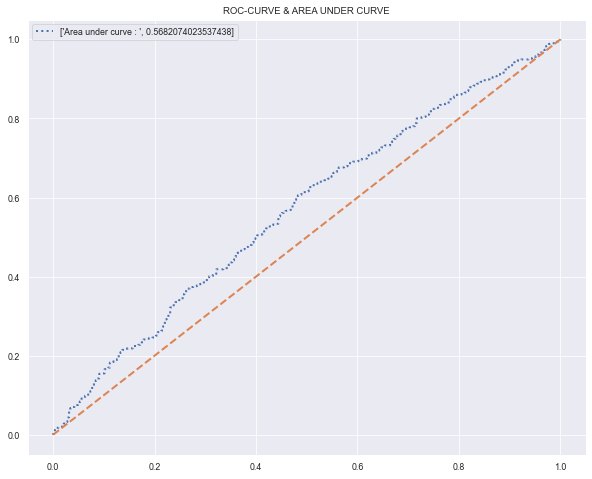

In [1408]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
model(logit,X_train,y_train,X_test,y_test,X_train.columns)